In [1]:
!pip install gdown

import numpy as np 
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import gdown
import pandas as pd
import seaborn as sns

In [2]:
#data augmentation for woman category
#import glob
#db_path = "Gender Recognition Images/"
#woman = [cv2.imread(file) for file in glob.glob(db_path+"woman/*.*")]
#for n in range(len(woman)):
#    cv2.imwrite("C:/Users/Nicho/OneDrive/Desktop/UNI/MAGISTRALE/Visione Artificiale/FER-and-GR-Project/Gender Recognition Images/woman/w{}.jpg".format(n),cv2.flip(woman[n],1))

In [3]:
file_path = "test.zip"
if not os.path.exists("Gender Recognition Images/"):
    gdown.download("https://drive.google.com/uc?id=1d-rWM32nIGUmEz7tCTNtA10mQLkxMyk2&confirm=t", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)

In [31]:
db_path = "Gender Recognition Images/"
batch_size = 64
num_classes = 2
img_height = 64
img_width = 64

In [32]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.20,
                                                               subset="training",
                                                               seed=123456,
                                                               label_mode = 'int',
                                                               color_mode='grayscale',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.20,
                                                               subset="validation",
                                                               seed=123,
                                                               label_mode = 'int',
                                                               color_mode='grayscale',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)


Found 30830 files belonging to 2 classes.
Using 24664 files for training.
Found 30830 files belonging to 2 classes.
Using 6166 files for validation.


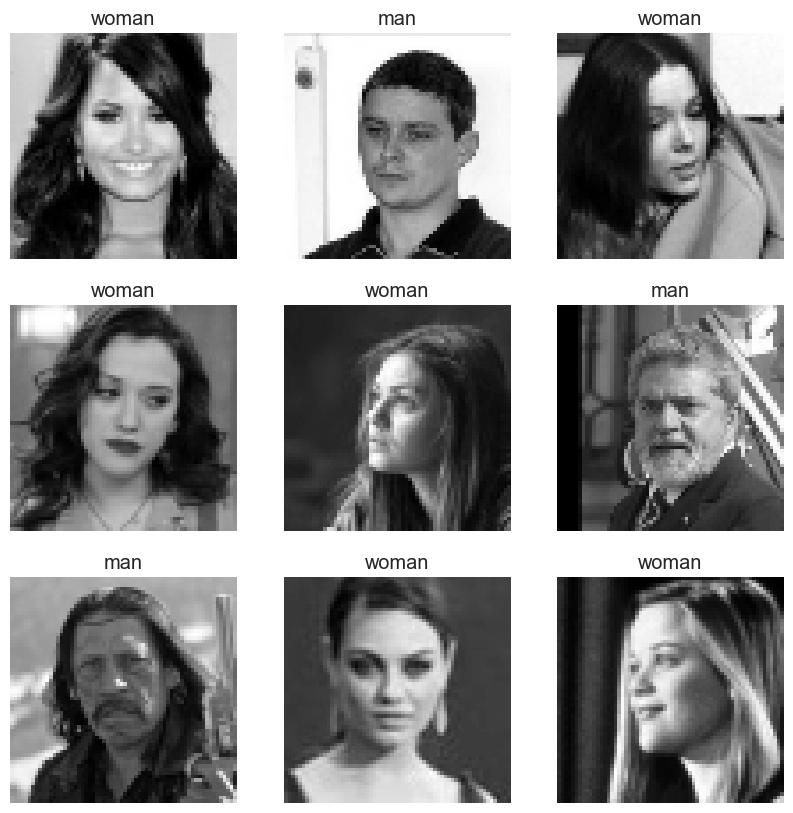

In [33]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8")[:,:,0], cmap="gray")
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [34]:
# Build the Model

model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,1)),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(256, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(512, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(256, activation='relu'),
                  layers.Dropout(0.2),  
                  layers.Dense(128, activation = 'relu'),
                  layers.Dropout(0.2),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  mode='min',
                                                  restore_best_weights=True
                                                 )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)      

In [35]:
# Train the model

epochs = 100
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs, batch_size = batch_size, 
                    verbose = 2, callbacks=[early_stopping])

Epoch 1/100
386/386 - 80s - loss: 0.5107 - accuracy: 0.7288 - val_loss: 0.3758 - val_accuracy: 0.8245 - 80s/epoch - 206ms/step
Epoch 2/100
386/386 - 77s - loss: 0.3494 - accuracy: 0.8403 - val_loss: 0.2704 - val_accuracy: 0.8939 - 77s/epoch - 199ms/step
Epoch 3/100
386/386 - 77s - loss: 0.2487 - accuracy: 0.8948 - val_loss: 0.2218 - val_accuracy: 0.9007 - 77s/epoch - 199ms/step
Epoch 4/100
386/386 - 77s - loss: 0.1996 - accuracy: 0.9190 - val_loss: 0.1566 - val_accuracy: 0.9361 - 77s/epoch - 199ms/step
Epoch 5/100
386/386 - 77s - loss: 0.1659 - accuracy: 0.9336 - val_loss: 0.1463 - val_accuracy: 0.9445 - 77s/epoch - 199ms/step
Epoch 6/100
386/386 - 77s - loss: 0.1396 - accuracy: 0.9449 - val_loss: 0.1177 - val_accuracy: 0.9539 - 77s/epoch - 198ms/step
Epoch 7/100
386/386 - 77s - loss: 0.1185 - accuracy: 0.9547 - val_loss: 0.1006 - val_accuracy: 0.9635 - 77s/epoch - 199ms/step
Epoch 8/100
386/386 - 77s - loss: 0.1041 - accuracy: 0.9603 - val_loss: 0.1145 - val_accuracy: 0.9582 - 77s/epo

In [36]:
model_acc = model.evaluate(val_ds)[1]
model_acc

97/97 [==============================] - 4s 36ms/step - loss: 0.0571 - accuracy: 0.9818


0.9818359017372131

In [37]:
#Save the Model
model.save('Gender Model/')

INFO:tensorflow:Assets written to: Gender Model/assets


INFO:tensorflow:Assets written to: Gender Model/assets


In [38]:
#Load the Gender Model
if not os.path.exists("Gender Model/"):
    gdown.download("https://drive.google.com/uc?id=1zwwyyd0CZZBDOYt6vSliejyq7NrGbRsT", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)
gender_model = keras.models.load_model('Gender Model/')
testData = tf.keras.preprocessing.image_dataset_from_directory(
    "Test Set/Gender",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    seed=123456,
    image_size=(img_height,img_width),
    batch_size=1000)


predictions = np.array([])
labels =  np.array([])
for x, y in testData:
    predictions = np.concatenate([predictions, np.argmax(gender_model.predict(x), axis = -1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

Found 436 files belonging to 2 classes.
14/14 [==============================] - 0s 16ms/step


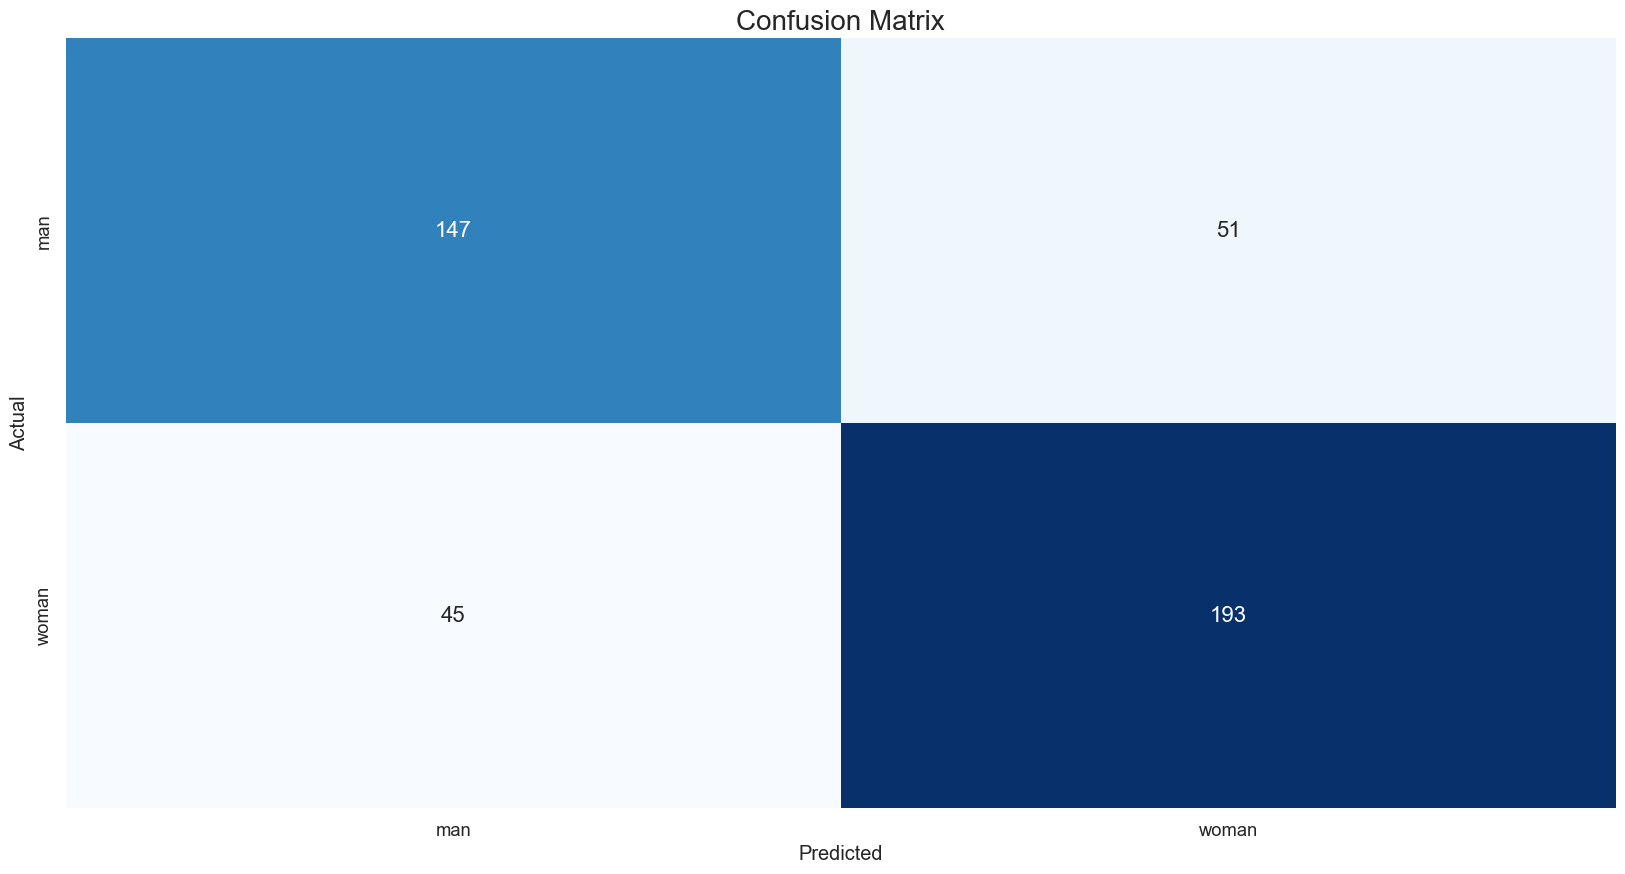

In [39]:
cm_data = confusion_matrix(labels , predictions)
cm = pd.DataFrame(cm_data, columns=class_names, index = class_names)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [40]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75       198
         1.0       0.79      0.81      0.80       238

    accuracy                           0.78       436
   macro avg       0.78      0.78      0.78       436
weighted avg       0.78      0.78      0.78       436

